# Social Network Analysis Project: Twitch users
This Notebook contains the code necessary for the final project for the Social Network Analysis course. The project focuses on the analysis of a Social Network graph of Twitch users.

## Setup

In [1]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
from infomap import Infomap
from collections import defaultdict
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF
from networkx.algorithms import approximation
import community.community_louvain as louvain
from mycolorpy import colorlist as mcp
from community.community_louvain import induced_graph
from statistics import mean
import random

## Import Dataset

In [54]:
# Define the country
country = "ENGB"

In [55]:
nodes = pd.read_csv(f"/Volumes/maxone/Courses/Social Network Analysis/project/twitch/{country}/musae_{country}_target.csv")
nodes.head(10)

,id,days,mature,views,partner,new_id
0,73045350,1459,False,9528,False,2299
1,61573865,1629,True,3615,False,153
2,171688860,411,True,46546,False,397
3,117338954,953,True,5863,False,5623
4,135804217,741,True,5594,False,5875
5,50273956,1820,False,4594,False,3346
6,40189534,2070,False,18460,False,6930
7,126853728,846,True,204,False,6367
8,118869338,936,True,1064,False,1434
9,115599547,973,False,313084,False,4470


In [56]:
nodes.partner.value_counts()

partner
False    6742
True      384
Name: count, dtype: int64

In [57]:
nodes.mature.value_counts()

mature
True     3888
False    3238
Name: count, dtype: int64

In [58]:
edges = pd.read_csv(f"/Volumes/maxone/Courses/Social Network Analysis/project/twitch/{country}/musae_{country}_edges.csv")
edges.head()

,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [59]:
edges.rename(columns={"from": "source", "to":"target"}, inplace=True)

In [60]:
edges.head()

,source,target
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


## Graph creation

In [61]:
graph = nx.Graph()

In [62]:
graph.add_nodes_from(nodes["new_id"])

In [63]:
graph.add_edges_from(zip(edges['source'], edges['target']))

In [64]:
print(graph)

Graph with 7126 nodes and 35324 edges


In [65]:
nx.set_node_attributes(graph, nodes['mature'].astype(int), 'mature')
nx.set_node_attributes(graph, nodes['partner'].astype(int), 'partner')
nx.set_node_attributes(graph, nodes["days"], "days")
nx.set_node_attributes(graph, nodes["views"], "views")

## Network Statistics

### Degree Statistics

In [401]:
degree = graph.degree()
degree_list = list(dict(degree).values())

In [402]:
print("Min Degree:\t{}".format(np.min(degree_list)))
print("Max Degree:\t{}".format(np.max(degree_list)))
print("Mean Degree:\t{:.2f}".format(np.mean(degree_list)))
print("Standard Dev:\t{:.2f}".format(np.std(degree_list)))
print("Median Degree:\t{:.0f}".format(np.median(degree_list)))

Min Degree:	1
Max Degree:	720
Mean Degree:	9.91
Standard Dev:	22.19
Median Degree:	5


### Density and avg shortest path

In [403]:
density = nx.density(graph)
density

0.0013914550620165345

In [ ]:
avg_shortest_path = nx.average_shortest_path_length(graph)

In [ ]:
print("Density:\t{:.6f}".format(density))
print("Avg shortest path:\t{:.0f}".format(avg_shortest_path))

### ECDF, ECCDF

Text(0.5, 1.0, 'ECDF plot - Linear scale')

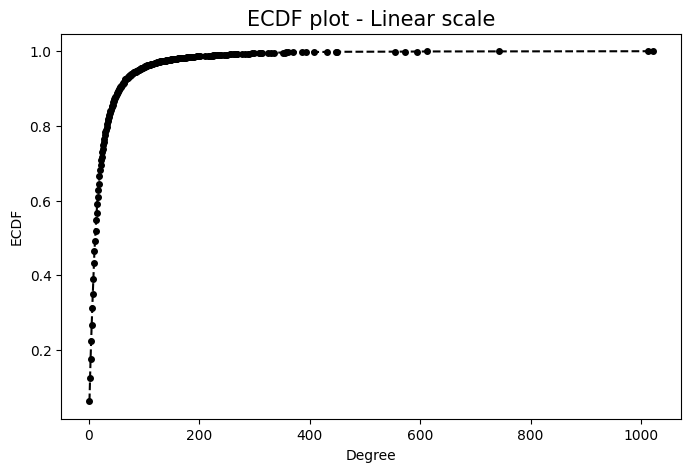

In [349]:
cdf_function = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf_function(x)

fig_cdf_function = plt.figure(figsize=(8,5)) 
axes = fig_cdf_function.gca()
axes.plot(x, y, color = 'black', linestyle = '--', marker = 'o',ms = 4)
axes.set_xlabel('Degree', size = 10)
axes.set_ylabel('ECDF', size = 10)
axes.set_title("ECDF plot - Linear scale", size=15)

Text(0.5, 1.0, 'ECDF plot - Log scale')

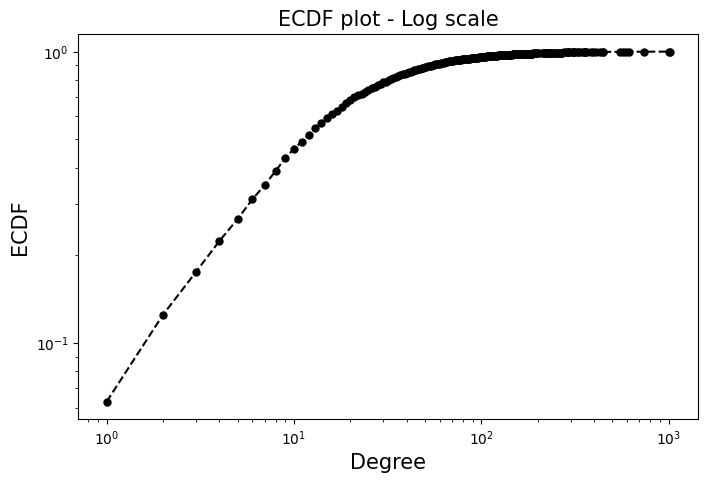

In [350]:
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x, y, color = 'black', linestyle = '--', marker = 'o',ms = 5)
axes.set_xlabel('Degree', size = 15)
axes.set_ylabel('ECDF', size = 15)
axes.set_title("ECDF plot - Log scale", size=15)

Text(0.5, 1.0, 'ECCDF - Log scale')

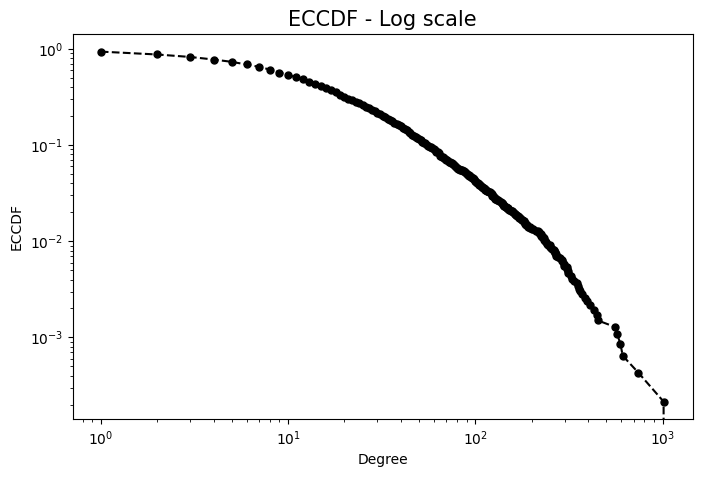

In [351]:
y = 1-cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x, y, color = 'black', linestyle = '--', marker = 'o',ms = 5)
axes.set_xlabel('Degree', size = 10)
axes.set_ylabel('ECCDF', size = 10)
axes.set_title("ECCDF - Log scale", size = 15)

### Comparison w/ Random Network

In [352]:
random_graph = nx.fast_gnp_random_graph(graph.order(),density)

In [353]:
print('Number of nodes:\t{}'.format(random_graph.order()))
print('Number of links:\t{}'.format(random_graph.size()))

Number of nodes:	4648
Number of links:	59152


In [354]:
random_degree_list = list(dict(random_graph.degree()).values())

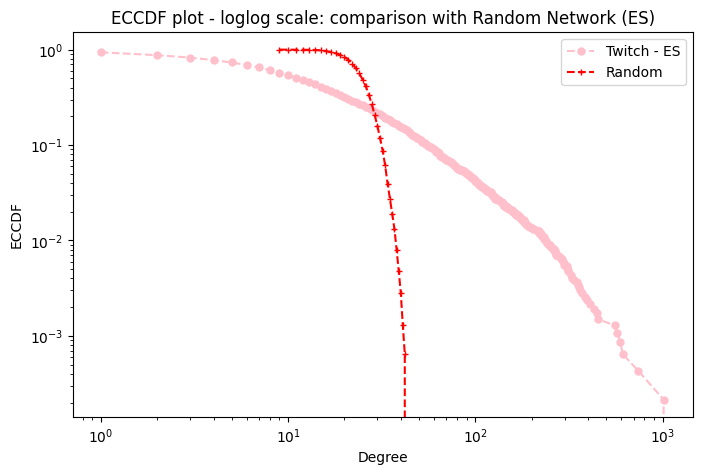

In [357]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

cdf_function = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf_function(x)

cdf_random = ECDF(random_degree_list)
x_random = np.unique(random_degree_list)
y_random = cdf_random(x_random)

fig_cdf_function = plt.figure(figsize=(8, 5))
axes = fig_cdf_function.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x, 1-y, color='pink', marker='o', ms=5, linestyle='--')
axes.plot(x_random, 1-y_random, color='red', marker='+', ms=5, linestyle='--')
axes.set_xlabel('Degree', size=10)
axes.set_ylabel('ECCDF', size=10)
axes.legend([f'Twitch - {country}', 'Random'])
axes.set_title(f"ECCDF plot - loglog scale: comparison with Random Network ({country})")

plt.savefig(f'eccdf_plot_{country}.png')

plt.show()

### Centrality

In [358]:
degree_centrality = nx.degree_centrality(graph)
#closeness_centrality = nx.closeness_centrality(graph)
#betweenness_centrality=nx.betweenness_centrality(graph)

In [359]:
degree_centrality
#print('Closeness centrality:\t{}'.format(closeness_centrality))
#print('Betweenness centrality:\t{}'.format(betweenness_centrality))

{3558: 0.0030126963632451046,
 3372: 0.023025607919087584,
 818: 0.002582311168495804,
 236: 0.001936733376371853,
 2255: 0.001291155584247902,
 663: 0.0017215407789972026,
 1444: 0.02754465246395524,
 1784: 0.02775984506132989,
 961: 0.002797503765870454,
 785: 0.002797503765870454,
 4331: 0.05035506778566817,
 1621: 0.0017215407789972026,
 3534: 0.000645577792123951,
 2837: 0.005164622336991608,
 4123: 0.0032278889606197547,
 1176: 0.007316548310738111,
 1757: 0.0017215407789972026,
 4041: 0.0015063481816225523,
 4521: 0.004734237142242307,
 1630: 0.0008607703894986013,
 524: 0.0017215407789972026,
 601: 0.001936733376371853,
 3310: 0.01269636324510437,
 3945: 0.0032278889606197547,
 3339: 0.01872175597159458,
 1110: 0.0030126963632451046,
 2295: 0.0010759629868732517,
 1598: 0.005595007531740908,
 2814: 0.0036582741553690557,
 3946: 0.004088659350118356,
 2627: 0.007962126102862063,
 3474: 0.00021519259737465033,
 1470: 0.006240585323864859,
 3320: 0.001291155584247902,
 3505: 0.005

### Assortativity

#### Degree assortativity

In [360]:
nx.degree_assortativity_coefficient(graph)

-0.1890507080398401

#### Attribute assortativity - Affiliate

In [361]:
nodes.partner.value_counts()

partner
False    4253
True      395
Name: count, dtype: int64

In [362]:
nx.attribute_assortativity_coefficient(graph, attribute= "partner", nodes=None)

-0.0013360652910730723

In [363]:
MM = nx.attribute_mixing_matrix(graph, attribute = "partner", nodes=None, mapping=None, normalized=True)

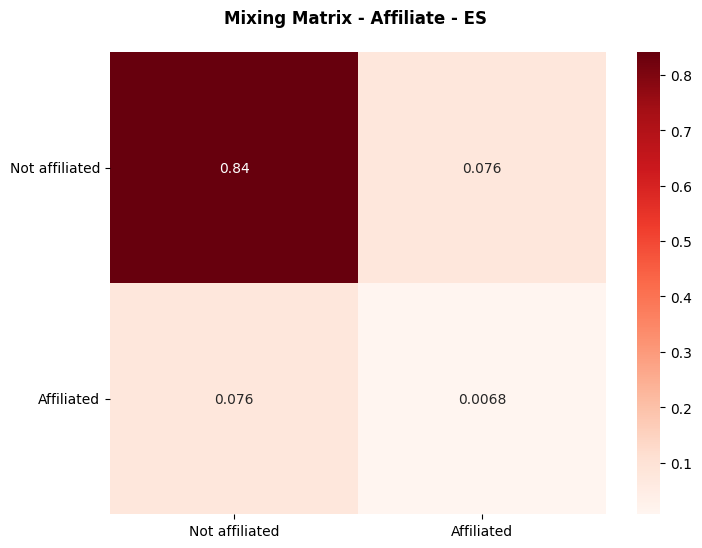

In [364]:
plt.figure(figsize = (8,6))
clusters = ["Not affiliated", "Affiliated"]
sns.heatmap(pd.DataFrame(pd.DataFrame(MM).iloc[0:5, 0:5]),annot = True,cmap = 'Reds')
plt.xticks([x+0.5 for x in range(2)],clusters, rotation = 0)
plt.yticks([x+0.5 for x in range(2)],clusters, rotation = 0)
plt.title(f'Mixing Matrix - Affiliate - {country} \n', weight = 'bold')
plt.savefig(f"MM-Affiliate-{country}.png")
plt.show()

In [365]:
nx.attribute_assortativity_coefficient(graph, attribute= "partner", nodes=None)

-0.0013360652910730723

#### Maturity

In [366]:
nx.attribute_assortativity_coefficient(graph, attribute= "mature", nodes=None)

-0.00317997671301849

In [367]:
MM_attribute = nx.attribute_mixing_matrix(graph, attribute = "mature", nodes=None, mapping=None, normalized=True)

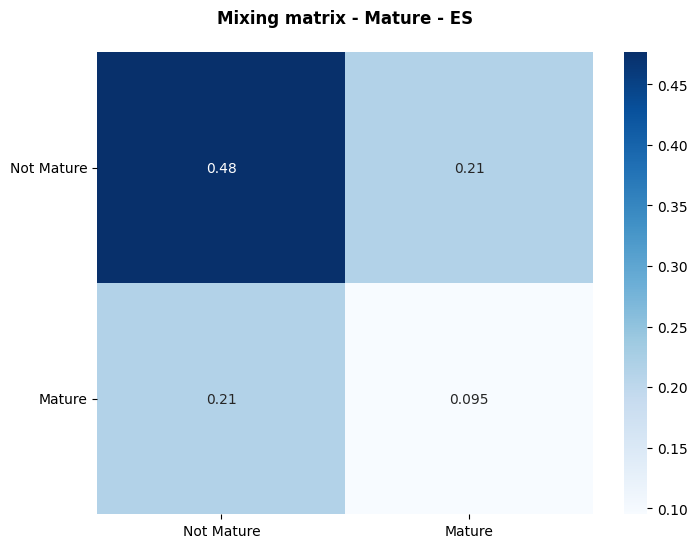

In [368]:
plt.figure(figsize = (8,6))
clusters = ['Not Mature', 'Mature']
sns.heatmap(pd.DataFrame(MM_attribute),annot = True,cmap = 'Blues')
plt.xticks([x+0.5 for x in range(2)],clusters, rotation = 0)
plt.yticks([x+0.5 for x in range(2)],clusters, rotation = 0)
plt.title(f'Mixing matrix - Mature - {country}\n', weight = 'bold')
plt.savefig(f"MM_Mature_{country}.png")
plt.show()

## Community detection

In [66]:
partition_louvain = louvain.best_partition(graph)

In [67]:
list_community_sets_louvain= defaultdict(set)
for n, comm in partition_louvain.items():
    list_community_sets_louvain[comm].add(n)

In [68]:
comm_len = [(c, len(nodes)) for c,nodes in list_community_sets_louvain.items()]
comm_len.sort(key = lambda x: x[1],reverse = True)

In [69]:
comm_len

[(2, 1114),
 (4, 1089),
 (5, 927),
 (10, 835),
 (8, 722),
 (6, 679),
 (7, 532),
 (0, 448),
 (1, 200),
 (3, 195),
 (12, 166),
 (9, 99),
 (17, 63),
 (15, 32),
 (13, 10),
 (11, 6),
 (14, 5),
 (16, 4)]

In [71]:
len(comm_len)

18

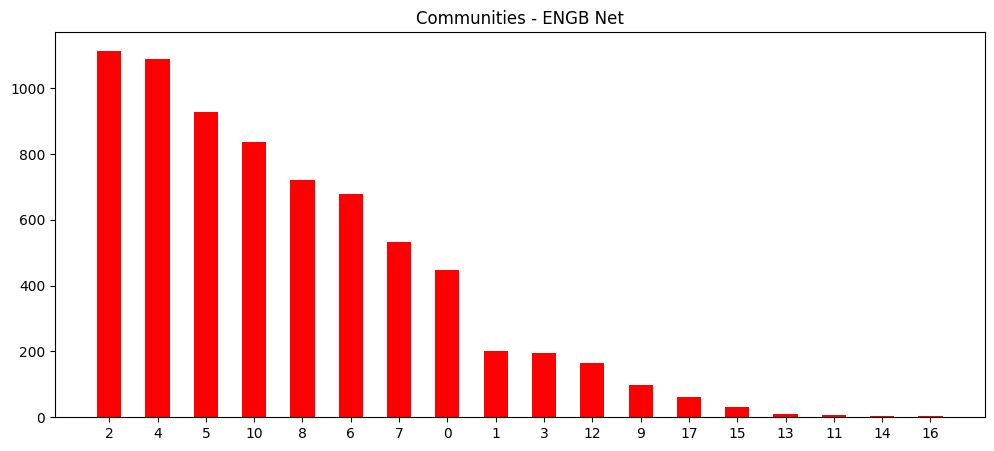

In [72]:
plt.figure(figsize = (12,5))
plt.bar(range(len(comm_len)), [x[1] for x in comm_len],width = 0.5, color = "red")
plt.xticks(range(len(comm_len)), [x[0] for x in comm_len])
plt.title(f"Communities - {country} Net")
plt.savefig(f"communities_{country}")
plt.show()

### Save the graph

In [78]:
nx.set_node_attributes(graph, partition_louvain, 'community')

In [79]:
nx.set_node_attributes(graph, degree_centrality, 'degree_centrality')

NameError: name 'degree_centrality' is not defined

In [376]:
nx.write_gexf(G = graph, path = f'twitch_graph_{country}.gexf')

#### Exploration of communities

In [80]:
df_graph = pd.DataFrame.from_dict(graph.nodes, orient='index')

In [81]:
df_graph

,mature,partner,days,views,community
2299,0,0,796,8508,0
153,1,0,1143,19916,1
397,0,0,1628,401,2
5623,1,0,2410,8060,3
5875,0,0,2083,7268,4
...,...,...,...,...,...
3794,1,0,1764,37356,2
6534,1,0,817,35829,4
2041,1,0,234,676,4
6870,1,1,1352,115228,2


In [109]:
df_graph['Count'] = 1

In [110]:
table = pd.pivot_table(df_graph, values='Count', index=['community'], columns=['mature'], aggfunc=np.sum)
table = table.fillna(0)

In [111]:
table

mature,0,1
community,,
0,219.0,229.0
1,96.0,104.0
2,503.0,611.0
3,98.0,97.0
4,504.0,585.0
5,431.0,496.0
6,284.0,395.0
7,241.0,291.0
8,322.0,400.0


In [112]:
table[0] = table[0]/sum(table[0])
table[1] = table[1]/sum(table[1])
round(100*table,1)

mature,0,1
community,,
0,6.8,5.9
1,3.0,2.7
2,15.5,15.7
3,3.0,2.5
4,15.6,15.0
5,13.3,12.8
6,8.8,10.2
7,7.4,7.5
8,9.9,10.3


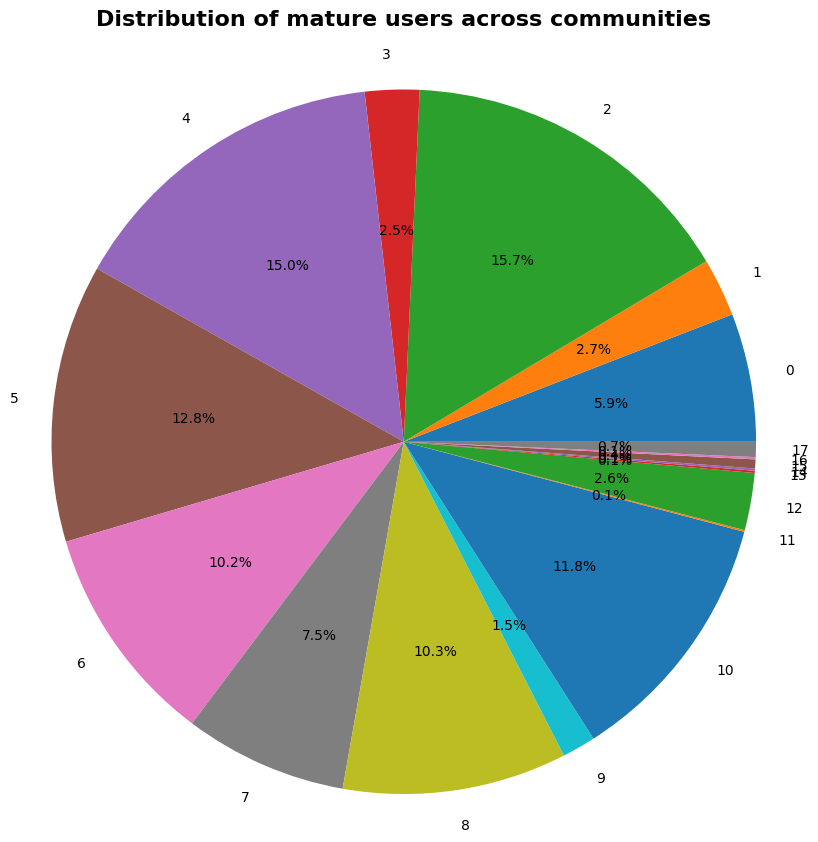

In [119]:
fig1, ax1 = plt.subplots(figsize =(10, 10))
ax1.pie(100*table[1], labels=table.index, autopct='%1.1f%%')
ax1.axis('equal')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Distribution of mature users across communities\n", fontdict=title_font)
plt.savefig("mature_distribution.png")
plt.show()

In [114]:
table_aff = pd.pivot_table(df_graph, values='Count', index=['community'], columns=['partner'], aggfunc=np.sum)
table_aff = table_aff.fillna(0)

In [106]:
table_aff

partner,0,1
community,,
0,421.0,27.0
1,190.0,10.0
2,1047.0,67.0
3,187.0,8.0
4,1030.0,59.0
5,887.0,40.0
6,648.0,31.0
7,500.0,32.0
8,677.0,45.0


In [107]:
table_aff[0] = table_aff[0]/sum(table_aff[0])
table_aff[1] = table_aff[1]/sum(table_aff[1])
round(100*table_aff,1)

partner,0,1
community,,
0,6.2,7.0
1,2.8,2.6
2,15.5,17.4
3,2.8,2.1
4,15.3,15.4
5,13.2,10.4
6,9.6,8.1
7,7.4,8.3
8,10.0,11.7


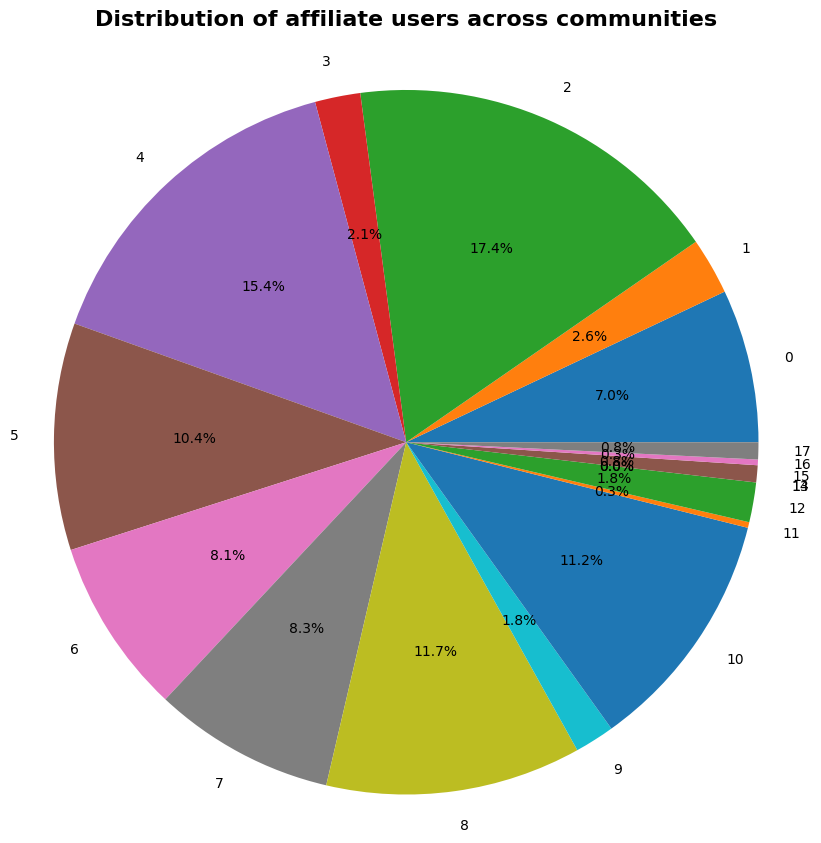

In [118]:
fig1, ax1 = plt.subplots(figsize =(10, 10))
ax1.pie(100*table_aff[1], labels=table_aff.index, autopct='%1.1f%%')
ax1.axis('equal')
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Distribution of affiliate users across communities\n", fontdict=title_font)
plt.savefig("affiliate_distribution.png")
plt.show()